# Разведочный анализ данных и начало машинного обучения

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/classification_1_2408.csv")

In [ ]:
df.head(10)

,age,sex,profession,income
0,37.0,female,unemployed,low
1,40.0,female,homewife,low
2,49.0,female,unemployed,low
3,36.0,female,homewife,low
4,50.0,female,worker,low
5,32.0,female,homewife,low
6,38.0,female,homewife,low
7,34.0,female,worker,low
8,33.0,female,homewife,low
9,33.0,female,homewife,low


In [ ]:
df.shape

(10000, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         9512 non-null   float64
 1   sex         9512 non-null   object 
 2   profession  10000 non-null  object 
 3   income      10000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 312.6+ KB


In [ ]:
df.describe()

,age
count,9512.000000
mean,34.985071
std,4.987882
min,15.000000
25%,32.000000
50%,35.000000
75%,38.000000
max,55.000000


In [ ]:
df.describe(include='object')

,sex,profession,income
count,9512,10000,10000
unique,2,3,2
top,female,worker,low
freq,5389,4154,9786


# Однофакторный анализ

In [ ]:
df[['age']].describe()

,age
count,10000.000000
mean,34.985071
std,4.864643
min,15.000000
25%,32.000000
50%,35.000000
75%,38.000000
max,55.000000


 *  в колонке "age" есть пропуски =>

1.   Nan  не так много, поэтому можно выбросить пропуски
2.   Можно заменить пропуски средним значением (проверим этот вариант)



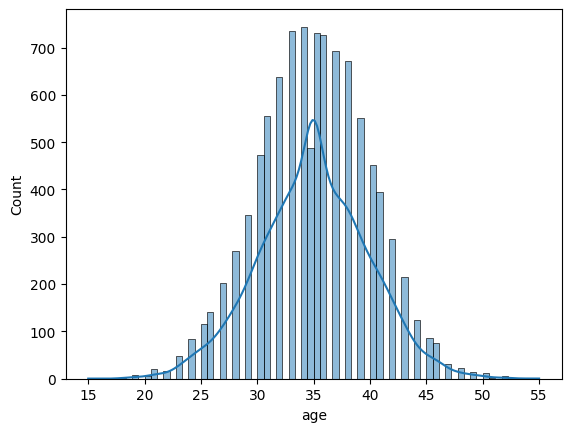

In [ ]:
sns.histplot(df['age'], kde=True)
plt.show()

 * Заменим пропуски средним значением

In [ ]:
mean = df['age'].mean()

df['age'].fillna(mean, inplace=True)

# Sex - profession (категориальные признаки)


In [ ]:
df['sex'].value_counts(dropna=False)

female     5389
male       4123
unknown     488
Name: sex, dtype: int64

* в "sex"-колонке есть пропуски

In [ ]:
df['profession'].value_counts(dropna=False)

worker        4154
homewife      3135
unemployed    2711
Name: profession, dtype: int64

* тут пропусков нет

In [ ]:
df['income'].value_counts(dropna=False)

low     9786
high     214
Name: income, dtype: int64

* пропусков нет

Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

* если пропусков много - можно удалить столбец

* можно пытаться предсказывать пропуски моделью

In [ ]:
df['sex'].value_counts(dropna=False, normalize=True)

female    0.5389
male      0.4123
NaN       0.0488
Name: sex, dtype: float64

In [ ]:
df['sex'].fillna("unknown", inplace=True)

df['sex'].value_counts(dropna=False)

female     5389
male       4123
unknown     488
Name: sex, dtype: int64

Построим гистограмму по полу

<Axes: xlabel='sex', ylabel='count'>

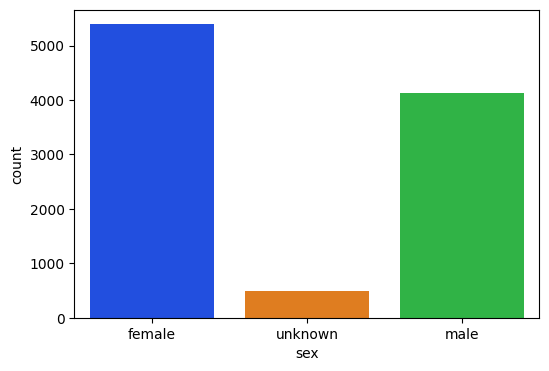

In [ ]:
plt.figure(figsize=(6,4))

sns.countplot(x='sex', data = df, palette='bright')

Нарисуем errorbar, используя standard deviation (обычное стандартное отклонение)

Углубимся в разведочный анализ, и посмотрим как влияет связка факторов на income:

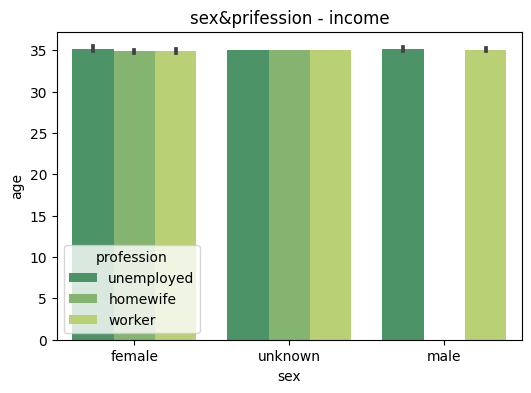

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='sex', y='age', hue='profession', data = df, palette='summer')
plt.title('sex&prifession - income')
plt.show()

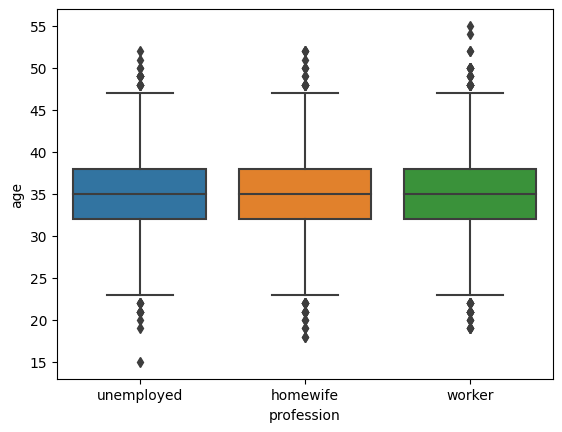

In [ ]:
sns.boxplot(x="profession", y="age", data=df)
plt.show()

# Машинное обучение

In [ ]:
y = df['income']
X = df.drop(['income'], axis=1)

In [ ]:
X

,age,sex,profession
0,37.000000,female,unemployed
1,40.000000,female,homewife
2,49.000000,female,unemployed
3,36.000000,female,homewife
4,50.000000,female,worker
...,...,...,...
9995,34.985071,unknown,unemployed
9996,34.985071,unknown,unemployed
9997,42.000000,male,unemployed
9998,29.000000,male,unemployed


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

categorical = ['sex', 'profession']
numeric_features = [col for col in x_train.columns if col not in categorical]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

X_train_st = column_transformer.fit_transform(x_train)
X_test_st = column_transformer.transform(x_test)


In [ ]:

from sklearn.preprocessing import MinMaxScaler
mm_column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])
X_train_mm = mm_column_transformer.fit_transform(x_train)
X_test_mm = mm_column_transformer.transform(x_test)

In [ ]:
simple_column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical)
])
X_train_simple = simple_column_transformer.fit_transform(x_train)
X_test_simple = simple_column_transformer.transform(x_test)

In [ ]:
pd.DataFrame(X_train_st).head(5)

,0,1,2,3,4,5,6
0,0.0,1.0,0.0,0.0,0.0,1.0,1.027284
1,1.0,0.0,0.0,0.0,1.0,0.0,0.206195
2,0.0,1.0,0.0,0.0,0.0,1.0,1.643101
3,1.0,0.0,0.0,1.0,0.0,0.0,-0.820166
4,1.0,0.0,0.0,0.0,0.0,1.0,0.822012


In [ ]:
y_train

9069    low
2603    low
7738    low
1579    low
5058    low
       ... 
5734    low
5191    low
5390    low
860     low
7270    low
Name: income, Length: 7000, dtype: object

# Model

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_st, y_train)

pred = model.predict(X_test_st)

In [ ]:
pred

array(['low', 'low', 'low', ..., 'low', 'low', 'low'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[   0,   68],
       [   0, 2932]])

In [ ]:
model.coef_

array([[ 2.3608655 , -1.56927881, -0.79157968,  0.95368016, -0.51149354,
        -0.44217961,  0.98648877]])